# <center>HUMAN REOURCE DATA EXPLORATION USING MySQL

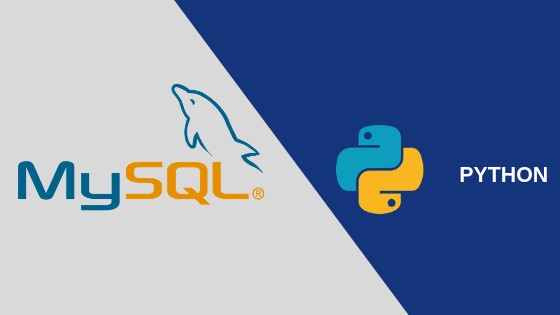

 ### <center>PRACTICAL GUIDE USING WINDOW FUNCTIONS AND SUB-QUERIES

## Contents

1. [ROW_NUMBER_VALUE()](#1.-ROW_NUMBER)<br>

2. [RANK_VALUE()](#2.-RANK)<br>

3. [LAG()](#3.-LAG)<br>

4. [FIRST VALUE()](#4.-FIRST-VALUE)<br>

5. [N^TH VALUE()](#5.-N^TH-VALUE)<br>

6. [LEAST/LAST VALUE()](#6.-LEAST/LAST-VALUE)<br>

7. [NTILE()](#7.-NTILE)<br>

8. [CUME_DIST()](#8.-CUME_DIST)<br>

9. [SELF JOIN](#9.-SELF-JOIN)<br>

10. [DATE FUNCTIONS](#10.-BONUS)

## Introduction
  The window functions work close to aggrgate functions. Like aggregate functions with the `GROUP BY` clause, window functions also operate on the subset of rows but they do not reduce the number of rows returned by the query. This project describes nonaggregate windows function which includes: `row_number()`,`rank()`,`lag()`,`first_value()`,`nth_value()`,`last_value()`,`ntile()`,`cume_dist()`, and two bonus queries for `self join`and `date_functions`.

__The general syntax of calling a window function is as follows:__

\begin{align}
window\:function(expression)\\
OVER(\:  [partition\: by]\\
[order \: by]\\
[frame]\:  )
\end{align}

 * Firstly, specify the window function name followed by an expression
 * Secondly, specify the `OVER` clause which has three possible elements i.e, `Partition by`, `order by` and frame definition.

Import libraries

In [26]:
import pandas as pd

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
import pymysql

Configure Jupyter Notebook with MySQL Database

In [29]:
# load MySQL database information
db_name = "hr_database"
db_host = "localhost"
db_username = "root"
db_password = "Mark@muli1$"

In [30]:
# create a coonnector between jupyter notebook and MySQL workbencch 
conn = pymysql.connect(host = db_host,
                          port = int(3306),
                          user = 'root',
                          passwd = db_password,
                          db = db_name)

SELECT THE WHOLE TABLE FROM THE DATABASE

In [31]:
data =''' SELECT *
                FROM hrdataset '''

In [32]:
pd.read_sql_query(data, conn).head(3)

,ï»¿Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3


UNDERSTANDING COLUMNS IN THE SELECTED TABLE

In [33]:
pd.read_sql_query(data, conn).columns

Index(['ï»¿Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

#### Retrieving columns of interest from the hrdataset table 

In [34]:
employee = ''' SELECT 
                     ï»¿Employee_Name,
                     ManagerName,
                     State,
                     EmpID,
                     ManagerID,
                     DOB,
                     Sex,
                     Position,
                     Department,
                     RecruitmentSource,
                     MaritalDesc,
                     DateofHire,
                     Absences,
                     DateofTermination,
                     TermReason,
                     EmploymentStatus,
                     Salary
              FROM hrdataset '''
employee = pd.read_sql_query(employee, conn)
employee.head(3)

,ï»¿Employee_Name,ManagerName,State,EmpID,ManagerID,DOB,Sex,Position,Department,RecruitmentSource,MaritalDesc,DateofHire,Absences,DateofTermination,TermReason,EmploymentStatus,Salary
0,"Adinolfi, Wilson K",Michael Albert,MA,10026,22,07/10/83,M,Production Technician I,Production,LinkedIn,Single,7/5/2011,1,,N/A-StillEmployed,Active,62506
1,"Ait Sidi, Karthikeyan",Simon Roup,MA,10084,4,05/05/75,M,Sr. DBA,IT/IS,Indeed,Married,3/30/2015,17,6/16/2016,career change,Voluntarily Terminated,104437
2,"Akinkuolie, Sarah",Kissy Sullivan,MA,10196,20,09/19/88,F,Production Technician II,Production,LinkedIn,Married,7/5/2011,3,9/24/2012,hours,Voluntarily Terminated,64955


## 1. `ROW_NUMBER`
- __`ROW_NUMBER()` returns the number of the current row within its partition. ROW_NUMBER() assigns different numbers to duplicates in the OVER() clause. To assign partitions the same value, use RANK() or DENSE_RANK()__.<BR>
    
The following task demonstrates how row_number() can be applied:

### Find the first 2 employees to join the company from each department by employee ID.
Display Date of hire, marital status, role, employment status and their salaries.

In [35]:
row_number =''' SELECT
                     EmpID,
                     ï»¿Employee_Name,
                     DateofHire,
                     Department,
                     Position,
                     Absences,
                     EmploymentStatus,
                     Salary,
                     row_number() over(PARTITION by Department ORDER BY EmpID) as row_num
                FROM hrdataset '''
row_number = pd.read_sql_query(row_number, conn)
row_number.head()

,EmpID,ï»¿Employee_Name,DateofHire,Department,Position,Absences,EmploymentStatus,Salary,row_num
0,10038,"LaRotonda, William",1/6/2014,Admin Offices,Accountant I,3,Active,64520,1
1,10039,"Singh, Nan",5/1/2015,Admin Offices,Administrative Assistant,2,Active,51920,2
2,10080,"Foster-Baker, Amy",1/5/2009,Admin Offices,Sr. Accountant,3,Active,99351,3
3,10081,"Boutwell, Bonalyn",2/16/2015,Admin Offices,Sr. Accountant,4,Active,106367,4
4,10134,"LeBlanc, Brandon R",1/5/2016,Admin Offices,Shared Services Manager,20,Active,93046,5


In [36]:
row_number=''' SELECT * 
               FROM ( SELECT
                           EmpID,
                           ï»¿Employee_Name,
                           DateofHire,
                           Department,
                           Position,
                           Absences,
                           EmploymentStatus,
                           Salary,
                           row_number() over(PARTITION by Department ORDER BY EmpID) as row_num
                      FROM hrdataset) AS X 
                WHERE X.row_num <= 2 '''
row_number = pd.read_sql_query(row_number, conn)
row_number

,EmpID,ï»¿Employee_Name,DateofHire,Department,Position,Absences,EmploymentStatus,Salary,row_num
0,10038,"LaRotonda, William",1/6/2014,Admin Offices,Accountant I,3,Active,64520,1
1,10039,"Singh, Nan",5/1/2015,Admin Offices,Administrative Assistant,2,Active,51920,2
2,10089,"King, Janet",7/2/2012,Executive Office,President & CEO,10,Active,250000,1
3,10008,"Lindsay, Leonara",1/21/2011,IT/IS,IT Support,14,Active,51777,1
4,10010,"Zamora, Jennifer",4/10/2010,IT/IS,CIO,16,Active,220450,2
5,10001,"Candie, Calvin",1/28/2016,Production,Production Manager,14,Active,72640,1
6,10002,"Anderson, Linda",1/9/2012,Production,Production Technician I,15,Active,57568,2
7,10006,"Driver, Elle",1/10/2011,Sales,Area Sales Manager,14,Active,74241,1
8,10013,"Torrence, Jack",1/9/2006,Sales,Area Sales Manager,6,Active,64397,2
9,10005,"Patronick, Lucas",11/7/2011,Software Engineering,Software Engineer,13,Voluntarily Terminated,108987,1


## 2. `RANK`
- __`RANK()` Assigns duplicates the same rank value and the next greater value has a rank higher by the number of duplicates minus one. `DENSE_RANK()` also assigns duplicates the same rank value, but the next higher value has a rank one greater. In other words, RANK() is similar to DENSE_RANK() function except that there are gaps in the sequence of ranked values when two or more rows have the same rank.__ <br>

Consider the following task which indicates how RANK() clause can be applied.

### Find the top  3 highest paid employees from each department. Display all the emoloyee information as in 1 above.

In [37]:
rank_number =''' SELECT
                     EmpID,
                     ï»¿Employee_Name,
                     DateofHire,
                     Department,
                     Position,
                     Absences,
                     EmploymentStatus,
                     Salary,
                     RANK() OVER(PARTITION by Department ORDER BY Salary DESC) as rank_num
                FROM hrdataset '''
rank_number = pd.read_sql_query(rank_number, conn)
rank_number.head()

,EmpID,ï»¿Employee_Name,DateofHire,Department,Position,Absences,EmploymentStatus,Salary,rank_num
0,10081,"Boutwell, Bonalyn",2/16/2015,Admin Offices,Sr. Accountant,4,Active,106367,1
1,10080,"Foster-Baker, Amy",1/5/2009,Admin Offices,Sr. Accountant,3,Active,99351,2
2,10134,"LeBlanc, Brandon R",1/5/2016,Admin Offices,Shared Services Manager,20,Active,93046,3
3,10038,"LaRotonda, William",1/6/2014,Admin Offices,Accountant I,3,Active,64520,4
4,10147,"Steans, Tyrone",9/29/2014,Admin Offices,Accountant I,9,Active,63003,5


In [38]:
rank_number='''  SELECT * 
                 FROM ( SELECT
                             EmpID,
                             ï»¿Employee_Name,
                             DateofHire,
                             Department,
                             Position,
                             Absences,
                             EmploymentStatus,
                             Salary,
                             RANK() OVER(PARTITION by Department ORDER BY Salary DESC) as rank_num
                        FROM hrdataset) AS X 
            WHERE X.rank_num <= 3 '''
rank_number = pd.read_sql_query(rank_number, conn)
rank_number

,EmpID,ï»¿Employee_Name,DateofHire,Department,Position,Absences,EmploymentStatus,Salary,rank_num
0,10081,"Boutwell, Bonalyn",2/16/2015,Admin Offices,Sr. Accountant,4,Active,106367,1
1,10080,"Foster-Baker, Amy",1/5/2009,Admin Offices,Sr. Accountant,3,Active,99351,2
2,10134,"LeBlanc, Brandon R",1/5/2016,Admin Offices,Shared Services Manager,20,Active,93046,3
3,10089,"King, Janet",7/2/2012,Executive Office,President & CEO,10,Active,250000,1
4,10010,"Zamora, Jennifer",4/10/2010,IT/IS,CIO,16,Active,220450,1
5,10015,"Foss, Jason",4/15/2011,IT/IS,IT Director,15,Active,178000,2
6,10288,"Monroe, Peter",2/15/2012,IT/IS,IT Manager - Infra,13,Active,157000,3
7,10019,"Corleone, Vito",1/5/2009,Production,Director of Operations,15,Active,170500,1
8,10144,"Vega, Vincent",8/1/2011,Production,Production Manager,19,Active,88976,2
9,10116,"Miller, Brannon",8/16/2012,Production,Production Manager,2,Active,83667,3


## 3. `LAG`
- __`LAG()` returns the value of the N$^{th}$ row _before_ the current row in a partitioned frame. It returns _NULL_ if no preceding row exists. Its a converse of `LEAD()` clause which returns the value of the N$^{th}$ row _after_ the current row in a partitioned frame.__<br>

The following task indicate how LAG() can be applied:

### Indicate weither the second employee from each department earns more, equal or less than the first employee and show the days each employee has been absent from from the first day of employment.

In [39]:
Salary_earn =''' SELECT
                     EmpID,
                     ï»¿Employee_Name,
                     DateofHire,
                     Department,
                     Position,
                     Absences,
                     EmploymentStatus,
                     Salary,
                     LAG(Salary) OVER(PARTITION by Department ORDER BY EmpID ASC) as prev_salary
                FROM hrdataset '''
Salary_earn = pd.read_sql_query(Salary_earn, conn)
Salary_earn.head()

,EmpID,ï»¿Employee_Name,DateofHire,Department,Position,Absences,EmploymentStatus,Salary,prev_salary
0,10038,"LaRotonda, William",1/6/2014,Admin Offices,Accountant I,3,Active,64520,NaN
1,10039,"Singh, Nan",5/1/2015,Admin Offices,Administrative Assistant,2,Active,51920,64520.0
2,10080,"Foster-Baker, Amy",1/5/2009,Admin Offices,Sr. Accountant,3,Active,99351,51920.0
3,10081,"Boutwell, Bonalyn",2/16/2015,Admin Offices,Sr. Accountant,4,Active,106367,99351.0
4,10134,"LeBlanc, Brandon R",1/5/2016,Admin Offices,Shared Services Manager,20,Active,93046,106367.0


In [40]:
Salary_earn =''' SELECT
                     EmpID,
                     ï»¿Employee_Name,
                     DateofHire,
                     Department,
                     Position,
                     Absences,
                     EmploymentStatus,
                     Salary,
                    LAG(Salary) OVER(PARTITION BY Department ORDER BY EmpID) as prev_income,
                        CASE WHEN Salary > LAG(Salary) OVER(PARTITION BY Department ORDER BY EmpID) THEN "higher than prev employee"
                             WHEN Salary = LAG(Salary) OVER(PARTITION BY Department ORDER BY EmpID) THEN "equal to prev employee"
                             WHEN Salary < LAG(Salary) OVER(PARTITION BY Department ORDER BY EmpID) THEN "less than prev employee"
                        END salary_range
                FROM hrdataset '''
Salary_earn = pd.read_sql_query(Salary_earn, conn)
Salary_earn.head(15)

,EmpID,ï»¿Employee_Name,DateofHire,Department,Position,Absences,EmploymentStatus,Salary,prev_income,salary_range
0,10038,"LaRotonda, William",1/6/2014,Admin Offices,Accountant I,3,Active,64520,NaN,None
1,10039,"Singh, Nan",5/1/2015,Admin Offices,Administrative Assistant,2,Active,51920,64520.0,less than prev employee
2,10080,"Foster-Baker, Amy",1/5/2009,Admin Offices,Sr. Accountant,3,Active,99351,51920.0,higher than prev employee
3,10081,"Boutwell, Bonalyn",2/16/2015,Admin Offices,Sr. Accountant,4,Active,106367,99351.0,higher than prev employee
4,10134,"LeBlanc, Brandon R",1/5/2016,Admin Offices,Shared Services Manager,20,Active,93046,106367.0,less than prev employee
5,10147,"Steans, Tyrone",9/29/2014,Admin Offices,Accountant I,9,Active,63003,93046.0,less than prev employee
6,10153,"Smith, Leigh Ann",9/26/2011,Admin Offices,Administrative Assistant,17,Voluntarily Terminated,55000,63003.0,less than prev employee
7,10182,"Howard, Estelle",2/16/2015,Admin Offices,Administrative Assistant,6,Terminated for Cause,49920,55000.0,less than prev employee
8,10238,"Brown, Mia",10/27/2008,Admin Offices,Accountant I,14,Active,63000,49920.0,higher than prev employee
9,10089,"King, Janet",7/2/2012,Executive Office,President & CEO,10,Active,250000,NaN,None


In [53]:
salary_range='''SELECT * 
                FROM ( SELECT
                            EmpID,
                            ï»¿Employee_Name,
                            DateofHire,
                            Department,
                            Position,
                            Absences,
                            EmploymentStatus,
                            Salary,
                            LAG(Salary) OVER(PARTITION BY Department ORDER BY EmpID) as prev_income,
                            CASE WHEN Salary > LAG(Salary) OVER(PARTITION BY Department ORDER BY EmpID) THEN "higher than prev employee"
                                 WHEN Salary = LAG(Salary) OVER(PARTITION BY Department ORDER BY EmpID) THEN "equal to prev employee"
                                 WHEN Salary < LAG(Salary) OVER(PARTITION BY Department ORDER BY EmpID) THEN "less than prev employee"
                                 END salary_range,
                            RANK() OVER(PARTITION BY Department ORDER BY EmpID ASC range between unbounded preceding and unbounded following) as rank_num
                        FROM hrdataset) AS X 
               WHERE X.rank_num <= 3 '''
salary_range = pd.read_sql_query(salary_range, conn)
salary_range

,EmpID,ï»¿Employee_Name,DateofHire,Department,Position,Absences,EmploymentStatus,Salary,prev_income,salary_range,rank_num
0,10038,"LaRotonda, William",1/6/2014,Admin Offices,Accountant I,3,Active,64520,NaN,None,1
1,10039,"Singh, Nan",5/1/2015,Admin Offices,Administrative Assistant,2,Active,51920,64520.0,less than prev employee,2
2,10080,"Foster-Baker, Amy",1/5/2009,Admin Offices,Sr. Accountant,3,Active,99351,51920.0,higher than prev employee,3
3,10089,"King, Janet",7/2/2012,Executive Office,President & CEO,10,Active,250000,NaN,None,1
4,10008,"Lindsay, Leonara",1/21/2011,IT/IS,IT Support,14,Active,51777,NaN,None,1
5,10010,"Zamora, Jennifer",4/10/2010,IT/IS,CIO,16,Active,220450,51777.0,higher than prev employee,2
6,10012,"Barbossa, Hector",11/10/2014,IT/IS,Data Analyst,9,Active,92328,220450.0,less than prev employee,3
7,10001,"Candie, Calvin",1/28/2016,Production,Production Manager,14,Active,72640,NaN,None,1
8,10002,"Anderson, Linda",1/9/2012,Production,Production Technician I,15,Active,57568,72640.0,less than prev employee,2
9,10003,"Billis, Helen",7/7/2014,Production,Production Technician I,19,Active,62910,57568.0,higher than prev employee,3


- NOTE: The above 'PARTITION BY' clause consists of __range between unbounded preceding and unbounded following__ statement. This is because if the frame definition is not defined, by default MySQL uses __RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW.__ Cosider the following meaning of each clause in the statements.<br>


 - `UNBOUNDED PRECEDING`: Frame starts at the first row of the partition.<br>
 - `CURRENT ROW`: The row of the current computation.<br>
 - `UNBOUNDED FOLLOWING`: The frame ends at the final row in the partition.<br>
 - `RANGE OR ROWS`: Define frame units in a window.<br>
 - `START AND BETWEEN`: Define frame boundary.
The above should be carefully considered espercially when using N$^{th}$ VALUE() clauses.

## 4. `FIRST VALUE`
- __`FIRST_VALUE(exp)` returns the value of '_exp_' from the first row of the window frame.__<br>

The following task demostrates how first_value clause can be applied:

### Find the highest paid employee from each department. Display salary, absent days, position and hired day

In [42]:
most_paid =''' SELECT * 
               FROM
                     ( SELECT
                         EmpID,
                         DateofHire,
                         Department,
                         Position,
                         Absences,
                         EmploymentStatus,
                         Salary,
                         FIRST_VALUE(ï»¿Employee_Name)  OVER (PARTITION BY Department ORDER BY Salary DESC 
                           range between unbounded preceding and unbounded following) AS 'most_paid'
                    FROM hrdataset) AS X
                    GROUP BY X.most_paid '''
most_paid = pd.read_sql_query(most_paid, conn)
most_paid

,EmpID,DateofHire,Department,Position,Absences,EmploymentStatus,Salary,most_paid
0,10081,2/16/2015,Admin Offices,Sr. Accountant,4,Active,106367,"Boutwell, Bonalyn"
1,10089,7/2/2012,Executive Office,President & CEO,10,Active,250000,"King, Janet"
2,10010,4/10/2010,IT/IS,CIO,16,Active,220450,"Zamora, Jennifer"
3,10019,1/5/2009,Production,Director of Operations,15,Active,170500,"Corleone, Vito"
4,10272,5/5/2014,Sales,Director of Sales,19,Active,180000,"Houlihan, Debra"
5,10005,11/7/2011,Software Engineering,Software Engineer,13,Voluntarily Terminated,108987,"Patronick, Lucas"


## 5. `N^TH VALUE`
- __`N^TH VALUE(expr, N)` returns the value of _expr_ from the N$^{TH}$ row of the window frame__<br>

The following task demonstrates how n$^{th}$value clause can be applied:

### Find the second highest paid employees from each department. Display salary, absent days, position and hired day.

In [43]:
fith_paid =''' SELECT * 
               FROM
                     ( SELECT
                         EmpID,
                         DateofHire,
                         Department,
                         Position,
                         Absences,
                         EmploymentStatus,
                         Salary,
                         NTH_VALUE(ï»¿Employee_Name, 5)  OVER (PARTITION BY Department ORDER BY Salary DESC 
                           range between unbounded preceding and unbounded following) AS 'fith_paid'
                    FROM hrdataset) AS X
                    GROUP BY X.fith_paid '''
fith_paid = pd.read_sql_query(fith_paid, conn)
fith_paid

,EmpID,DateofHire,Department,Position,Absences,EmploymentStatus,Salary,fith_paid
0,10081,2/16/2015,Admin Offices,Sr. Accountant,4,Active,106367,"Steans, Tyrone"
1,10089,7/2/2012,Executive Office,President & CEO,10,Active,250000,None
2,10010,4/10/2010,IT/IS,CIO,16,Active,220450,"Ruiz, Ricardo"
3,10019,1/5/2009,Production,Director of Operations,15,Active,170500,"Landa, Hans"
4,10272,5/5/2014,Sales,Director of Sales,19,Active,180000,"Carter, Michelle"
5,10005,11/7/2011,Software Engineering,Software Engineer,13,Voluntarily Terminated,108987,"Exantus, Susan"


## 6. `LEAST/LAST VALUE`
- __`LAST_VALUE(expr)`returns the value of _expr_ from the last row of the window frame.__ <br>

The following task shows how last_value() clause can be applied on data:

### Find the least paid employee from each department. Display salary, absent days, position and hired day.

In [44]:
least_paid =''' SELECT * 
               FROM
                     ( SELECT
                         EmpID,
                         DateofHire,
                         Department,
                         Position,
                         Absences,
                         EmploymentStatus,
                         Salary,
                         LAST_VALUE(ï»¿Employee_Name)   OVER w AS 'least_paid'
                FROM hrdataset 
                     WINDOW w AS (PARTITION BY Department ORDER BY Salary DESC 
                       range between unbounded preceding and unbounded following)) AS X
                    GROUP BY X.least_paid '''
least_paid = pd.read_sql_query(least_paid, conn)
least_paid

,EmpID,DateofHire,Department,Position,Absences,EmploymentStatus,Salary,least_paid
0,10081,2/16/2015,Admin Offices,Sr. Accountant,4,Active,106367,"Howard, Estelle"
1,10089,7/2/2012,Executive Office,President & CEO,10,Active,250000,"King, Janet"
2,10010,4/10/2010,IT/IS,CIO,16,Active,220450,"Bacong, Alejandro"
3,10019,1/5/2009,Production,Director of Operations,15,Active,170500,"Zima, Colleen"
4,10272,5/5/2014,Sales,Director of Sales,19,Active,180000,"Villanueva, Noah"
5,10005,11/7/2011,Software Engineering,Software Engineer,13,Voluntarily Terminated,108987,"Cady, Max"


## 7. `NTILE`
- __`NTILE(N)` divides a partition into _N_ groups (buckets), assigns each row in the partition its bucket number and returns the bucket number of the current row within its partition.__ <br>

The task below indicates how to apply this clause:

### Seperate all the first, second and third paid employees in the admin offices department

In [45]:
salary_bucket =''' SELECT
                         EmpID,
                         ï»¿Employee_Name,
                         DateofHire,
                         Department,
                         Position,
                         Absences,
                         EmploymentStatus,
                         Salary,
                         NTILE(3) OVER(PARTITION BY Department ORDER BY Salary DESC) AS buckets
                FROM hrdataset '''
salary_bucket = pd.read_sql_query(salary_bucket, conn)
salary_bucket.head()

,EmpID,ï»¿Employee_Name,DateofHire,Department,Position,Absences,EmploymentStatus,Salary,buckets
0,10081,"Boutwell, Bonalyn",2/16/2015,Admin Offices,Sr. Accountant,4,Active,106367,1
1,10080,"Foster-Baker, Amy",1/5/2009,Admin Offices,Sr. Accountant,3,Active,99351,1
2,10134,"LeBlanc, Brandon R",1/5/2016,Admin Offices,Shared Services Manager,20,Active,93046,1
3,10038,"LaRotonda, William",1/6/2014,Admin Offices,Accountant I,3,Active,64520,2
4,10147,"Steans, Tyrone",9/29/2014,Admin Offices,Accountant I,9,Active,63003,2


In [46]:
Nth_paid_jobrole='''SELECT Department, 
                           Position,
                           ï»¿Employee_Name,
                          CASE WHEN buckets = 1 THEN "highest"
                               WHEN buckets = 2 THEN "second"
                               WHEN buckets = 3 THEN "third" 
                               END salary_category
                   FROM(SELECT
                         EmpID,
                         ï»¿Employee_Name,
                         DateofHire,
                         Department,
                         Position,
                         Absences,
                         EmploymentStatus,
                         Salary,
                         NTILE(3) OVER(PARTITION BY Department ORDER BY Salary DESC) AS buckets
                FROM hrdataset) AS x
                WHERE Department = "Admin Offices"'''
Nth_paid_jobrole = pd.read_sql_query(Nth_paid_jobrole, conn)
Nth_paid_jobrole

,Department,Position,ï»¿Employee_Name,salary_category
0,Admin Offices,Sr. Accountant,"Boutwell, Bonalyn",highest
1,Admin Offices,Sr. Accountant,"Foster-Baker, Amy",highest
2,Admin Offices,Shared Services Manager,"LeBlanc, Brandon R",highest
3,Admin Offices,Accountant I,"LaRotonda, William",second
4,Admin Offices,Accountant I,"Steans, Tyrone",second
5,Admin Offices,Accountant I,"Brown, Mia",second
6,Admin Offices,Administrative Assistant,"Smith, Leigh Ann",third
7,Admin Offices,Administrative Assistant,"Singh, Nan",third
8,Admin Offices,Administrative Assistant,"Howard, Estelle",third


## 8. `CUME_DIST`
- __`CUME_DIST()` return the cumulative distribution of a value within the group of values, i.e., the percentage of partition values less than or equall to the value in the current row. This function should be used with 'ORDER BY' clause to sort partition rows into the order as shown on the following task:__

### Extract positions that constitutes of less than 1% of the overall fileds based on monthly income

In [47]:
Salary_earn =''' SELECT
                     EmpID,
                     ï»¿Employee_Name,
                     DateofHire,
                     Department,
                     Position,
                     Absences,
                     EmploymentStatus,
                     Salary,
                     CUME_DIST() OVER(ORDER BY Salary DESC) AS cume_distribution
                FROM hrdataset '''
Salary_earn = pd.read_sql_query(Salary_earn, conn)
Salary_earn.head()

,EmpID,ï»¿Employee_Name,DateofHire,Department,Position,Absences,EmploymentStatus,Salary,cume_distribution
0,10089,"King, Janet",7/2/2012,Executive Office,President & CEO,10,Active,250000,0.003300
1,10010,"Zamora, Jennifer",4/10/2010,IT/IS,CIO,16,Active,220450,0.006601
2,10272,"Houlihan, Debra",5/5/2014,Sales,Director of Sales,19,Active,180000,0.009901
3,10015,"Foss, Jason",4/15/2011,IT/IS,IT Director,15,Active,178000,0.013201
4,10019,"Corleone, Vito",1/5/2009,Production,Director of Operations,15,Active,170500,0.016502


In [48]:
Salary_earn =''' SELECT
                     EmpID,
                     ï»¿Employee_Name,
                     DateofHire,
                     Department,
                     Position,
                     Absences,
                     EmploymentStatus,
                     Salary,
                     CUME_DIST() OVER(ORDER BY Salary DESC) AS cume_distribution,
                     ROUND(CUME_DIST() OVER(ORDER BY Salary DESC)*100, 2) AS cume_dist_percentage
                FROM hrdataset '''
Salary_earn = pd.read_sql_query(Salary_earn, conn)
Salary_earn.head()

,EmpID,ï»¿Employee_Name,DateofHire,Department,Position,Absences,EmploymentStatus,Salary,cume_distribution,cume_dist_percentage
0,10089,"King, Janet",7/2/2012,Executive Office,President & CEO,10,Active,250000,0.003300,0.33
1,10010,"Zamora, Jennifer",4/10/2010,IT/IS,CIO,16,Active,220450,0.006601,0.66
2,10272,"Houlihan, Debra",5/5/2014,Sales,Director of Sales,19,Active,180000,0.009901,0.99
3,10015,"Foss, Jason",4/15/2011,IT/IS,IT Director,15,Active,178000,0.013201,1.32
4,10019,"Corleone, Vito",1/5/2009,Production,Director of Operations,15,Active,170500,0.016502,1.65


In [49]:
Nth_paid_jobrole ='''SELECT Position, 
                            CONCAT(cume_dist_percentage,'%') AS cume_dist_percentage
                     FROM
                         ( SELECT
                                 EmpID,
                                 ï»¿Employee_Name,
                                 DateofHire,
                                 Department,
                                 Position,
                                 Absences,
                                 EmploymentStatus,
                                 Salary,
                                 CUME_DIST() OVER(ORDER BY Salary DESC) AS cume_distribution,
                                 ROUND(CUME_DIST() OVER(ORDER BY Salary DESC)*100, 2) AS cume_dist_percentage
                            FROM hrdataset) AS X
                         WHERE X.cume_dist_percentage <1  '''
Nth_paid_jobrole = pd.read_sql_query(Nth_paid_jobrole, conn)
Nth_paid_jobrole.head()

,Position,cume_dist_percentage
0,President & CEO,0.33%
1,CIO,0.66%
2,Director of Sales,0.99%


## BONUS

## 9. `SELF JOIN`
### Find employees who work from the same department but have different positions

In [50]:
employee =''' SELECT
                    O.EmpID,
                    O.Department,
                    O.Position,
                    O.Salary
                FROM hrdataset O
                     JOIN hrdataset C 
                     ON  O.EmpID != C.EmpID
                     AND O.Department = C.Department
                     AND O.Position != C.Position'''
employee = pd.read_sql_query(employee, conn)
employee.tail()

,EmpID,Department,Position,Salary
22271,10175,Production,Production Manager,74312
22272,10267,Production,Production Technician II,57815
22273,10294,Production,Production Technician II,66441
22274,10023,Production,Production Technician II,70131
22275,10196,Production,Production Technician II,64955


## 10. `BONUS`
### Date, Year, Month and Week convertions 

In [51]:
date_hired =''' SELECT
                     EmpID,
                     ï»¿Employee_Name,
                     DateofHire,
                     str_to_date(`DateofHire`, "%d/%m/%Y") AS DATE,
                     TRIM(YEAR(str_to_date(`DateofHire`, "%d/%m/%Y"))+0) AS YEAR,
                     TRIM(QUARTER(str_to_date(`DateofHire`, "%d/%m/%Y"))+0)  AS QUARTER,
                     MONTHNAME(str_to_date(`DateofHire`, "%d/%m/%Y")) AS MONTH,
                     TRIM(DAYOFMONTH(str_to_date(`DateofHire`, "%d/%m/%Y"))+0)  AS MONTH_NO,
                     TRIM(DAYOFWEEK(str_to_date(`DateofHire`, "%d/%m/%Y"))+0)  AS WEEK_DAY_NO,
                     DAYNAME(str_to_date(`DateofHire`, "%d/%m/%Y")) AS DAY
                FROM hrdataset '''
date_hired = pd.read_sql_query(date_hired, conn)
date_hired.head()

,EmpID,ï»¿Employee_Name,DateofHire,DATE,YEAR,QUARTER,MONTH,MONTH_NO,WEEK_DAY_NO,DAY
0,10026,"Adinolfi, Wilson K",7/5/2011,2011-05-07,2011,2,May,7,7,Saturday
1,10084,"Ait Sidi, Karthikeyan",3/30/2015,None,None,None,None,None,None,None
2,10196,"Akinkuolie, Sarah",7/5/2011,2011-05-07,2011,2,May,7,7,Saturday
3,10088,"Alagbe,Trina",1/7/2008,2008-07-01,2008,3,July,1,3,Tuesday
4,10069,"Anderson, Carol",7/11/2011,2011-11-07,2011,4,November,7,2,Monday
